<a href="https://colab.research.google.com/github/Zardian18/SkimLit/blob/master/SkimLit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SkimLit

## Dataset

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 43.61 MiB/s, done.
Resolving deltas: 100% (15/15), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [2]:
!ls pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.zip


Trying with 10% data first

In [3]:
data_dir="/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [4]:
import os

filenames=[data_dir+ filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [5]:
def read_files(filename):

  with open(filename, "r") as f:
    return f.readlines()

In [6]:
train_lines= read_files(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

We want the data in a list of dict in form :

```
[{'line_number':0,
  'target':'BACKGROUND',
  'text': 'Emotional eating is associated with overeating and the development of obesity .\n',
  'total_lines': 11},
  ...]
```

In [120]:
# def preprocess_data(filename):
#   num_line = 0
#   index = 0
#   start_line=0
#   end_line=0
#   total_line=[]
#   train_line_dict = [{}]
#   for line in train_lines:
#       if "###" in line:
#         start_line=num_line
#         continue
#       elif line[0]=="\n":
#         end_line=num_line
#         total_line.append(end_line-start_line)
#         index+=1
#         continue
#       split_line = line.split()
#       # print(f"split_line: {split_line}")
#       train_line_dict.append({
#           # "line_number": num_line,
#           "target": split_line[0],  # This line may cause an IndexError
#           "text": " ".join(split_line[1:]).lower()
#           # "total_lines":total_line[index]
#       })


#       num_line += 1



#   ind=0
#   line_counter=0
#   # train_line_dict=train_line_dict[1:]
#   for i in range(0, len(train_line_dict)-1):
#     line_counter+=1
#     if line_counter > total_line[ind]:
#       line_counter=0
#       ind+=1
#     if i < len(train_line_dict):
#       train_line_dict[i]["total_lines"]= total_line[ind]
#       train_line_dict[i]["line_number"]= line_counter


#   return train_line_dict

In [127]:
def preprocess_data(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = read_files(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts

  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list

    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line

  return abstract_samples

In [128]:
train_dict= preprocess_data(data_dir + "train.txt")
train_dict[:15]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [129]:
test_dict= preprocess_data(data_dir + "test.txt")
test_dict[:5]

[{'target': 'BACKGROUND',
  'text': 'this study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( adhf ) .',
  'line_number': 0,
  'total_lines': 8},
 {'target': 'RESULTS',
  'text': 'a post hoc analysis was conducted with the use of data from the evaluation study of congestive heart failure and pulmonary artery catheterization effectiveness ( escape ) .',
  'line_number': 1,
  'total_lines': 8},
 {'target': 'RESULTS',
  'text': 'liver function tests ( lfts ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .',
  'line_number': 2,
  'total_lines': 8},
 {'target': 'RESULTS',
  'text': 'survival analyses were used to assess the association between admission model of end-stage liver disease excluding international normalized ratio ( meld-xi ) scores and patient outcome.there was a high prevalence of abnormal baseline ( admission ) lfts ( albumin @ % , aspartate transaminase @ %

In [130]:
val_dict= preprocess_data(data_dir + "dev.txt")
val_dict[:5]

[{'target': 'BACKGROUND',
  'text': 'ige sensitization to aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .',
  'line_number': 0,
  'total_lines': 9},
 {'target': 'BACKGROUND',
  'text': 'it is not clear whether these patients would benefit from antifungal treatment .',
  'line_number': 1,
  'total_lines': 9},
 {'target': 'OBJECTIVE',
  'text': 'we sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are ige sensitized to a fumigatus .',
  'line_number': 2,
  'total_lines': 9},
 {'target': 'METHODS',
  'text': 'asthmatic patients who were ige sensitized to a fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .',
  'line_number': 3,
  'total_lines': 9},
 {'targe

In [131]:
import pandas as pd

train_df= pd.DataFrame(train_dict)
test_df= pd.DataFrame(test_dict)
val_df= pd.DataFrame(val_dict)

train_df.head(50)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [132]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

In [155]:
len(val_df)

30212

<Axes: ylabel='Frequency'>

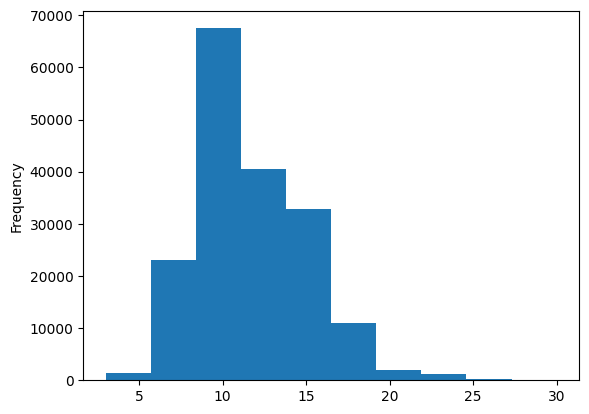

In [113]:
train_df["total_lines"].plot.hist()

In [20]:
train_sentences= train_df["text"].tolist()

In [156]:
test_sentences= test_df["text"].tolist()
val_sentences= val_df["text"].tolist()

In [22]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

## One hot encoding the labels

In [159]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder= OneHotEncoder(sparse=False)
train_labels_one_hot= one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot= one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot= one_hot_encoder.fit_transform(val_df["target"].to_numpy().reshape(-1,1))


train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [161]:
len(val_labels_one_hot)

30212

In [24]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [162]:
label_encoder= LabelEncoder()

train_labels_encoded= label_encoder.fit_transform(train_df["target"].to_numpy())
test_labels_encoded= label_encoder.fit_transform(test_df["target"].to_numpy())
val_labels_encoded= label_encoder.fit_transform(val_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [163]:
num_classes= len(label_encoder.classes_)
class_names= label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [27]:
train_sentences[:3]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .']

## Model 0: Baseline

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model0= Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model0.fit(train_sentences, train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
model0.score(val_sentences, val_labels_encoded)

0.7516829593423684

In [30]:
baseline_preds= model0.predict(val_sentences)
baseline_preds

array([1, 2, 4, ..., 4, 1, 2])

In [31]:
val_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [32]:
!wget https://raw.githubusercontent.com/Zardian18/helper-functions-colab/master/helper.py

from helper import calculate_results

--2023-12-28 11:23:43--  https://raw.githubusercontent.com/Zardian18/helper-functions-colab/master/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11274 (11K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  11.01K  --.-KB/s    in 0s      

2023-12-28 11:23:43 (50.0 MB/s) - ‘helper.py’ saved [11274/11274]



In [33]:
from helper import calculate_results

In [34]:
model0_results= calculate_results(val_labels_encoded, baseline_preds)
model0_results

{'accuracy': 75.16829593423684,
 'precision': 0.7556121877731266,
 'recall': 0.7516829593423684,
 'f1': 0.734085177322999}

In [35]:
sum=0
for line in train_df["text"]:
  sum+= len(line.split())

print(sum/len(train_df))

sent_len= [len(sentence.split()) for sentence in train_sentences]

26.338269273494777


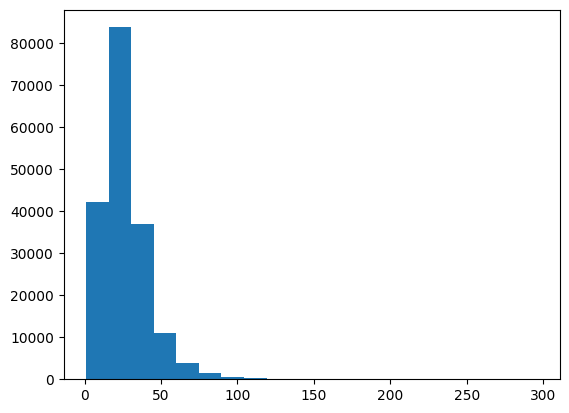

In [36]:
import matplotlib.pyplot as plt
plt.hist(sent_len, bins=20);

In [37]:
import numpy as np

output_seq_len= int(np.percentile(sent_len, 95))
output_seq_len

55

In [38]:
sent_len[:3]

[49, 27, 15]

In [39]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding

text_vectorizer= TextVectorization(max_tokens=68000,
                                   output_sequence_length=55,
                                   pad_to_max_tokens=True)

In [40]:
text_vectorizer.adapt(train_sentences)

In [41]:
import random
rand_sent= random.choice(train_sentences)
print(f"Text: {rand_sent}")
print(f"Length of text: {len(rand_sent.split())}")
print(f"Vectorized Text: {text_vectorizer(rand_sent)}")

Text: generalised increase in breast density and skin thickening were more common in the ebrt compared to the iort group ( p = @ ; p = @ , ( @ ) test respectively ) .
Length of text: 35
Vectorized Text: [ 7219   179     5   413  1009     3   538  7001     9    69   317     5
     2 10007    34     6     2  9149    13    14    14   128    83     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]


In [42]:
vocab_words_20k= text_vectorizer.get_vocabulary()
print(f"Vocal Length: {vocab_words_20k}")

Vocal Length: ['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were', 'was', 'for', 'patients', 'group', 'p', 'at', 'or', 'study', 'on', 'treatment', 'is', 'after', 'by', 'this', 'groups', 'as', 'an', 'from', 'that', 'randomized', 'between', 'not', 'trial', 'no', 'compared', 'control', 'be', 'significant', 'intervention', 'significantly', 'n', 'months', 'than', 'we', 'vs', 'rsb', 'lsb', 'clinical', 'placebo', 'baseline', 'ci', 'two', 'during', 'weeks', 'both', 'had', 'primary', 'mean', 'are', 'using', 'participants', 'there', 'all', 'time', 'years', 'pain', 'therapy', 'who', 'mg', 'more', 'effect', 'effects', 'but', 'risk', 'difference', 'outcomes', 'total', 'care', 'rate', 'efficacy', 'received', 'associated', 'higher', 'respectively', 'days', 'analysis', 'outcome', 'use', 'one', 'week', 'women', 'may', 'randomly', 'levels', 'followup', 'will', 'increased', 'health', 'used', 'have', 'data', 'score', 'differences', 'age', 'subjects', 'lower', 'controlled', 'blood', 'day', 'c

In [43]:
print(f"Most common words: {vocab_words_20k[:5]}")
print(f"Least common words: {vocab_words_20k[-5:]}")

Most common words: ['', '[UNK]', 'the', 'and', 'of']
Least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [44]:
len(vocab_words_20k)

64841

In [45]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': True,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [46]:
embedding= tf.keras.layers.Embedding(input_dim=len(vocab_words_20k),
                     output_dim=128,
                     mask_zero=True,
                     input_length=55)
embedding

In [47]:
print(f"Before vectorization: {rand_sent}")
vect_sent= text_vectorizer([rand_sent])
print(f"Vectorized sentence: {vect_sent}")
embed_sent= embedding(vect_sent)
print(f"Embedded sent: {embed_sent}")

Before vectorization: generalised increase in breast density and skin thickening were more common in the ebrt compared to the iort group ( p = @ ; p = @ , ( @ ) test respectively ) .
Vectorized sentence: [[ 7219   179     5   413  1009     3   538  7001     9    69   317     5
      2 10007    34     6     2  9149    13    14    14   128    83     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]
Embedded sent: [[[-0.01770651 -0.00113778 -0.00598285 ...  0.01451461  0.01926073
    0.02767077]
  [-0.03812747 -0.01211347  0.03913667 ...  0.04831782  0.02786077
   -0.03476664]
  [-0.00377047 -0.01859587  0.02295137 ... -0.01104688 -0.03107362
   -0.0200206 ]
  ...
  [-0.04367561  0.00428666  0.04882462 ... -0.00382973 -0.00707709
   -0.00380168]
  [-0.04367561  0.00428666  0.04882462 ... -0.00382973 -0.00707709
   -0.00380168]
  [-0.04367561  0.

In [48]:
embed_sent.shape

TensorShape([1, 55, 128])

In [49]:
# train_sentences1= np.array(train_sentences, dtype="object")
# val_sentences1= np.array(val_sentences, dtype="object")
# test_sentences1= np.array(test_sentences, dtype="object")


## Creating fast dataset

In [164]:
train_dataset= tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset= tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset= tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))


train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [165]:
train_dataset= train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset= val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset= test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 1: Conv1D

In [52]:
inputs= tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x= text_vectorizer(inputs)
x= embedding(x)
print(x.shape)
x= tf.keras.layers.Conv1D(filters=64,
                          kernel_size=5,
                          activation="relu")(x)
print(x.shape)
x= tf.keras.layers.GlobalMaxPool1D()(x)
outputs= tf.keras.layers.Dense(5, activation="softmax")(x)

model1a= tf.keras.Model(inputs, outputs)

model1a.summary()

(None, 55, 128)
(None, 51, 64)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 55, 128)           8299648   
                                                                 
 conv1d (Conv1D)             (None, 51, 64)            41024     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (

In [53]:
model1a.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [54]:
history1= model1a.fit(train_dataset,
                     steps_per_epoch= int(0.1*len(train_dataset)), # only viewing 2K samples
                     epochs=3,
                     validation_data=val_dataset)

Epoch 1/3
562/562 [==============================] - 58s 102ms/step - loss: 0.8471 - accuracy: 0.6794 - val_loss: 0.6088 - val_accuracy: 0.7774
Epoch 2/3
562/562 [==============================] - 52s 92ms/step - loss: 0.5896 - accuracy: 0.7827 - val_loss: 0.5383 - val_accuracy: 0.8049
Epoch 3/3
562/562 [==============================] - 52s 92ms/step - loss: 0.5521 - accuracy: 0.7992 - val_loss: 0.5010 - val_accuracy: 0.8198


In [55]:
model1_pred_probs= model1a.predict(val_dataset)
model1_pred_probs, model1_pred_probs.shape

5627/5627 [==============================] - 18s 3ms/step


(array([[4.2540234e-02, 2.5408754e-02, 1.8429382e-03, 9.3004537e-01,
         1.6268255e-04],
        [1.4671034e-03, 9.7486225e-04, 9.4555175e-01, 7.6069759e-04,
         5.1245607e-02],
        [3.1125846e-03, 1.1925261e-02, 7.6755130e-01, 1.8043873e-03,
         2.1560650e-01],
        ...,
        [3.0628344e-02, 5.3869885e-01, 5.0004188e-02, 1.8938288e-02,
         3.6173031e-01],
        [5.3246655e-03, 7.2074950e-01, 2.7541586e-03, 5.3600441e-03,
         2.6581168e-01],
        [3.0847073e-01, 7.6519534e-02, 1.5812188e-01, 4.4680151e-01,
         1.0086408e-02]], dtype=float32),
 (180040, 5))

In [56]:
model1_preds= tf.argmax(model1_pred_probs, axis=1)
model1_preds[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([3, 2, 2, 2, 2])>

In [57]:
model1_results= calculate_results(val_labels_encoded, model1_preds)
model1_results

{'accuracy': 81.98400355476561,
 'precision': 0.8189099549738115,
 'recall': 0.819840035547656,
 'f1': 0.8183858511034201}

In [58]:
model0_results

{'accuracy': 75.16829593423684,
 'precision': 0.7556121877731266,
 'recall': 0.7516829593423684,
 'f1': 0.734085177322999}

## Model 2: Tensorflow hub feature extractor

In [59]:
import tensorflow_hub as hub

model_url = "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2"
embed= hub.load(model_url)
embed_samples= embed(["hello world", "Universal Sentence Encoder"])

print(embed_samples[0][:50])

tf.Tensor(
[-0.02607422 -0.08460002 -0.02678661  0.05678423  0.06197045  0.03822602
  0.02011494  0.02740877  0.0869832   0.03079179  0.04104117  0.02551835
  0.00096512  0.05892798  0.04009536  0.04670895 -0.03312796  0.04070418
 -0.01199297 -0.04761707 -0.00829665  0.07054674  0.00484351  0.08098248
 -0.05701774 -0.06435516  0.06971473 -0.06988385  0.02646064 -0.02352202
  0.05523751  0.04913642  0.05698972 -0.06107194  0.03608509  0.02324465
  0.05601753 -0.01095515  0.04213083 -0.01769539  0.00712432  0.02047029
 -0.07101265 -0.08455775  0.04360583  0.04793973 -0.0901802  -0.06873439
  0.01279598  0.01624986], shape=(50,), dtype=float32)


In [60]:
embed

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x790fe41251b0>

In [61]:
embed_samples.shape

TensorShape([2, 512])

In [62]:
sentences_encoder_layer= hub.KerasLayer(model_url,
                                        dtype=tf.string,
                                        name="sentence_encoder")

In [63]:
sentences_encoder_layer

In [64]:
# mdel2= tf.keras.sequential()
# model2.add(tf.keras.layers.Input(shape=(1,), dtype=tf.string))
# model2.add(sentences_encoder_layer)
# model2.add(tf.keras.layers.GlobalAveragePooling1D())
# model2.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

In [65]:
num_classes

5

In [66]:
inputs= tf.keras.layers.Input(shape=[], dtype=tf.string)
x= sentences_encoder_layer(inputs)
x= tf.keras.layers.Dense(128, activation="relu")(x)
outputs= tf.keras.layers.Dense(num_classes, activation="softmax")(x)

model2= tf.keras.Model(inputs, outputs)


model2.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 sentence_encoder (KerasLay  (None, 512)               256797824 
 er)                                                             
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [67]:
history2= model2.fit(train_dataset,
                     steps_per_epoch= int(0.1*len(train_dataset)),
                     epochs=3,
                     validation_data= val_dataset)

Epoch 1/3
562/562 [==============================] - 40s 68ms/step - loss: 0.9124 - accuracy: 0.6503 - val_loss: 0.8061 - val_accuracy: 0.6905
Epoch 2/3
562/562 [==============================] - 38s 67ms/step - loss: 0.7707 - accuracy: 0.7002 - val_loss: 0.7645 - val_accuracy: 0.7057
Epoch 3/3
562/562 [==============================] - 45s 81ms/step - loss: 0.7553 - accuracy: 0.7113 - val_loss: 0.7476 - val_accuracy: 0.7114


In [68]:
model2_pred_probs= model2.predict(val_dataset)
model2_pred_probs, model2_pred_probs.shape

5627/5627 [==============================] - 37s 6ms/step


(array([[1.88129038e-01, 2.55341649e-01, 3.55926575e-03, 5.51252782e-01,
         1.71730365e-03],
        [1.11246738e-03, 3.51520535e-03, 7.94747889e-01, 4.05716419e-04,
         2.00218886e-01],
        [6.54294491e-02, 2.29462221e-01, 5.67585647e-01, 4.42405157e-02,
         9.32820961e-02],
        ...,
        [1.19157031e-01, 5.39973497e-01, 9.35194418e-02, 1.30904466e-01,
         1.16445474e-01],
        [2.11047605e-02, 5.45835674e-01, 4.07298608e-03, 3.25678103e-02,
         3.96418631e-01],
        [3.57750095e-02, 5.32460995e-02, 6.88244700e-01, 1.12625211e-01,
         1.10108830e-01]], dtype=float32),
 (180040, 5))

In [69]:
model2_preds= tf.argmax(model2_pred_probs, axis=1)
model2_preds

<tf.Tensor: shape=(180040,), dtype=int64, numpy=array([3, 2, 2, ..., 1, 1, 2])>

In [70]:
model2_results= calculate_results(val_labels_encoded, model2_preds)
model2_results

{'accuracy': 71.13530326594089,
 'precision': 0.7138189996238863,
 'recall': 0.711353032659409,
 'f1': 0.708662973429966}

## Character Level Embedding

First we need character level tokenizer

In [71]:
def split_chars(text):
  return " ".join(list(text))

In [166]:
train_chars=[split_chars(sent) for sent in train_sentences]
val_chars=[split_chars(sent) for sent in val_sentences]
test_chars=[split_chars(sent) for sent in test_sentences]

train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [167]:
char_lens= [len(sentence) for sentence in train_sentences]
mean_char_len= np.mean(char_lens)
mean_char_len

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

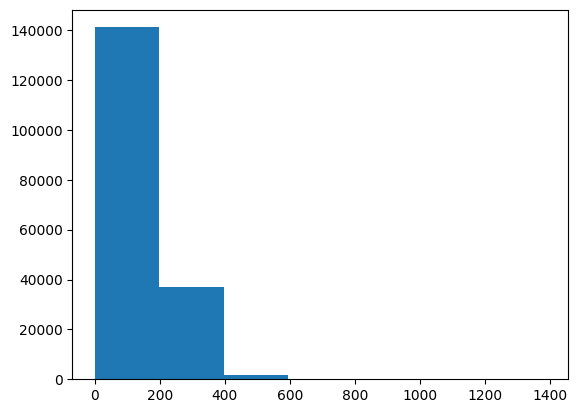

In [74]:
plt.hist(char_lens, bins=7)

In [75]:
int(np.percentile(char_lens, 95))

290

In [76]:
import string

alphabet= string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [77]:
NUM_CHAR_TOKENS = len(alphabet) + 2 # space and OOV

In [78]:
char_vectorizer= TextVectorization(max_tokens= NUM_CHAR_TOKENS,
                                   output_sequence_length = 290,
                                   pad_to_max_tokens= True)

In [79]:
char_vectorizer.adapt(train_chars)

In [80]:
char_vocab= char_vectorizer.get_vocabulary()

char_vocab[:5]

['', '[UNK]', 'e', 't', 'i']

In [81]:
char_vocab[-5:]

['k', 'x', 'z', 'q', 'j']

In [82]:
rand_chars= random.choice(train_chars)

print(f"Train Chars: {rand_chars}")
print(f"Length: {len(rand_chars)}")
print(f"Vectorized: {[char_vectorizer(rand_chars)]}")

Train Chars: t h e   g a b a p e n t i n   g r o u p   u s e d   l e s s   m o r p h i n e   i n   t h e   f i r s t   @   h   a f t e r   s u r g e r y   - l s b -   g   =   @   (   @   m g   )   ,   p   =   @   (   @   m g   )   - r s b -   (   p   <   @   )   a n d   h a d   i n c r e a s e d   k n e e   r a n g e   o f   m o t i o n   c o m p a r e d   w i t h   t h e   p l a c e b o   g r o u p   i n - h o s p i t a l   (   p   <   @   )   .
Length: 437
Vectorized: [<tf.Tensor: shape=(290,), dtype=int64, numpy=
array([ 3, 13,  2, 18,  5, 22,  5, 14,  2,  6,  3,  4,  6, 18,  8,  7, 16,
       14, 16,  9,  2, 10, 12,  2,  9,  9, 15,  7,  8, 14, 13,  4,  6,  2,
        4,  6,  3, 13,  2, 17,  4,  8,  9,  3, 13,  5, 17,  3,  2,  8,  9,
       16,  8, 18,  2,  8, 19, 12,  9, 22, 18, 15, 18, 14, 15, 18,  8,  9,
       22, 14,  5,  6, 10, 13,  5, 10,  4,  6, 11,  8,  2,  5,  9,  2, 10,
       23,  6,  2,  2,  8,  5,  6, 18,  2,  7, 17, 15,  7,  3,  4,  7,  6,
       11,  7, 15, 14,  5,  

In [83]:
# embedding

char_embedding= tf.keras.layers.Embedding(input_dim= len(char_vocab),
                                          output_dim= 25,
                                          mask_zero= True)

In [84]:
print(f"Random sentence: {rand_chars}")
print(f"Embedded form: {char_embedding(char_vectorizer([rand_chars]))}")
print(f"Embedded Shape: {char_embedding(char_vectorizer([rand_chars])).shape}")


Random sentence: t h e   g a b a p e n t i n   g r o u p   u s e d   l e s s   m o r p h i n e   i n   t h e   f i r s t   @   h   a f t e r   s u r g e r y   - l s b -   g   =   @   (   @   m g   )   ,   p   =   @   (   @   m g   )   - r s b -   (   p   <   @   )   a n d   h a d   i n c r e a s e d   k n e e   r a n g e   o f   m o t i o n   c o m p a r e d   w i t h   t h e   p l a c e b o   g r o u p   i n - h o s p i t a l   (   p   <   @   )   .
Embedded form: [[[ 0.00349037  0.00937627  0.04374137 ... -0.03920523 -0.00603007
   -0.00642331]
  [-0.02088496  0.04425282  0.00465106 ... -0.00113691 -0.03722645
    0.00101367]
  [ 0.00955449  0.0362925  -0.03338342 ...  0.04361388 -0.03245683
   -0.04407274]
  ...
  [-0.046461   -0.02270964  0.02374351 ... -0.00065149  0.00668241
    0.03531933]
  [-0.046461   -0.02270964  0.02374351 ... -0.00065149  0.00668241
    0.03531933]
  [-0.046461   -0.02270964  0.02374351 ... -0.00065149  0.00668241
    0.03531933]]]
Embedded Shape: (1, 290,

## Model 3: Conv1d with char embedding

In [85]:
inputs= tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x= char_vectorizer(inputs)
x= char_embedding(x)
x= tf.keras.layers.Conv1D(filters=64,
                          kernel_size=5,
                          padding= "same",
                          activation="relu")(x)
x= tf.keras.layers.GlobalMaxPool1D()(x)
outputs= tf.keras.layers.Dense(num_classes, activation="softmax")(x)

model3= tf.keras.Model(inputs, outputs)

model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 290)               0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_3 (Dense)             (None, 5)                 325 

In [86]:
model3.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [87]:
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [168]:
train_char_dataset= tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset= tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset= tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [89]:
history3= model3.fit(train_char_dataset,
                     steps_per_epoch= int(0.1*len(train_char_dataset)),
                     epochs=3,
                     validation_data=val_char_dataset,
                     validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 10s 16ms/step - loss: 1.2623 - accuracy: 0.4874 - val_loss: 1.0563 - val_accuracy: 0.5866
Epoch 2/3
562/562 [==============================] - 9s 16ms/step - loss: 1.0236 - accuracy: 0.5922 - val_loss: 0.9712 - val_accuracy: 0.6211
Epoch 3/3
562/562 [==============================] - 9s 16ms/step - loss: 0.9401 - accuracy: 0.6332 - val_loss: 0.8940 - val_accuracy: 0.6554


In [90]:
model3_pred_probs= model3.predict(val_char_dataset)

5627/5627 [==============================] - 23s 4ms/step


In [91]:
model3_preds= tf.argmax(model3_pred_probs, axis=1)
model3_preds[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([3, 2, 2, 2, 2])>

In [92]:
model3_results= calculate_results(val_labels_encoded,
                                  model3_preds)

model3_results

{'accuracy': 65.21161964007999,
 'precision': 0.6461357383093633,
 'recall': 0.6521161964007999,
 'f1': 0.6395067215129716}

## Model 4: multimodal model

In [93]:
from tensorflow.keras import layers

In [94]:
#1
token_inputs= layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings= sentences_encoder_layer(token_inputs)
token_outputs= layers.Dense(128, activation="relu")(token_embeddings)

token_model= tf.keras.Model(inputs=token_inputs,
                            outputs= token_outputs)


#2
char_inputs= layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors= char_vectorizer(char_inputs)
char_embeddings= char_embedding(char_vectors)
char_bi_lstm= layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model= tf.keras.Model(inputs= char_inputs,
                           outputs= char_bi_lstm)

#3
token_char_concat= layers.Concatenate(name="token_char_hybrid")([token_model.output, char_model.output])

#4
combined_dropout= layers.Dropout(0.5)(token_char_concat)
combined_dense= layers.Dense(128, activation="relu")(combined_dropout)
final_dropout= layers.Dropout(0.5)(combined_dense)

output_layer= layers.Dense(num_classes, activation="softmax")(final_dropout)

#5
model4= tf.keras.Model(inputs=[token_model.input, char_model.input],
                       outputs= output_layer,
                       name="model4")

In [95]:
model4.summary()

Model: "model4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 text_vectorization_1 (Text  (None, 290)                  0         ['char_input[0][0]']          
 Vectorization)                                                                                   
                                                                                                  
 sentence_encoder (KerasLay  (None, 512)                  2567978   ['token_input[0][0]']    

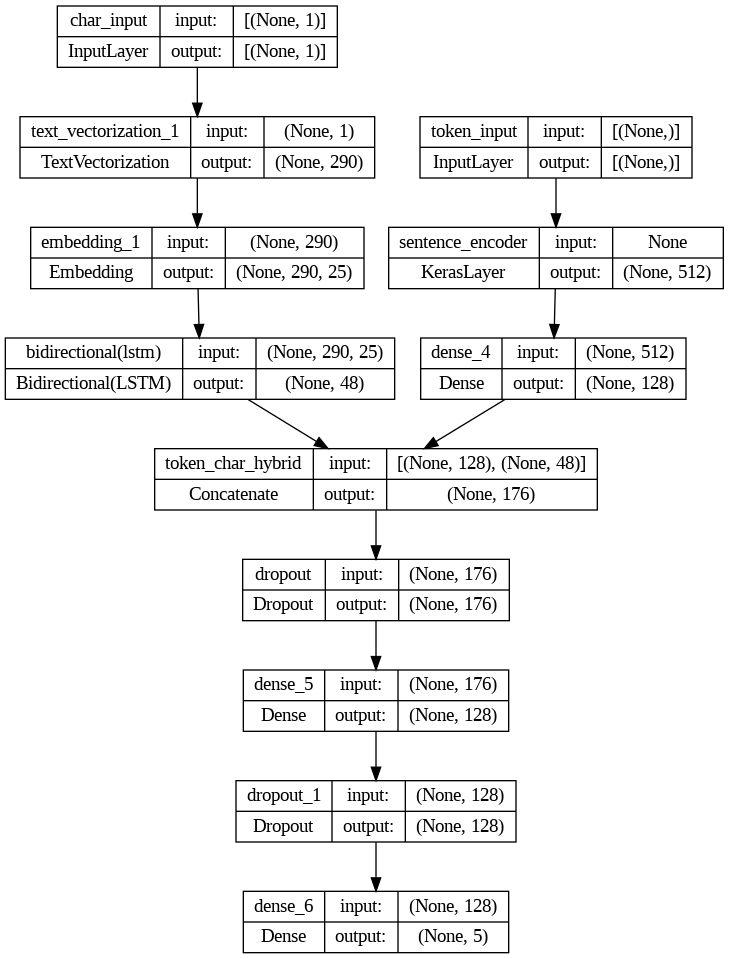

In [96]:
from keras.utils import plot_model

plot_model(model4, show_shapes=True)

In [97]:
model4.compile(loss="categorical_crossentropy",
               optimizer= tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [169]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels= tf.data.Dataset.from_tensor_slices((train_labels_one_hot))
train_char_token_dataset= tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))
train_char_token_dataset= train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels= tf.data.Dataset.from_tensor_slices((val_labels_one_hot))
val_char_token_dataset= tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset= val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_char_token_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_token_labels= tf.data.Dataset.from_tensor_slices((test_labels_one_hot))
test_char_token_dataset= tf.data.Dataset.zip((test_char_token_data, test_char_token_labels))
test_char_token_dataset= test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [170]:
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [100]:
history4= model4.fit(train_char_token_dataset,
                     steps_per_epoch= int(0.1*len(train_char_token_dataset)),
                     epochs=3,
                     validation_data= val_char_token_dataset,
                     validation_steps= int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 147s 246ms/step - loss: 0.9846 - accuracy: 0.6097 - val_loss: 0.7651 - val_accuracy: 0.7130
Epoch 2/3
562/562 [==============================] - 113s 201ms/step - loss: 0.7968 - accuracy: 0.6916 - val_loss: 0.7074 - val_accuracy: 0.7349
Epoch 3/3
562/562 [==============================] - 106s 188ms/step - loss: 0.7725 - accuracy: 0.7046 - val_loss: 0.6974 - val_accuracy: 0.7354


In [101]:
model4_pred_probs= model4.predict(val_char_token_dataset)

5627/5627 [==============================] - 209s 37ms/step


In [102]:
model4_preds= tf.argmax(model4_pred_probs, axis=1)
model4_preds

<tf.Tensor: shape=(180040,), dtype=int64, numpy=array([3, 2, 2, ..., 1, 1, 2])>

In [104]:
model4_results= calculate_results(val_labels_encoded,
                                  model4_preds)

In [105]:
model4_results

{'accuracy': 73.22095089980004,
 'precision': 0.7359992024856523,
 'recall': 0.7322095089980004,
 'f1': 0.7301064775929552}

In [106]:
model1_results

{'accuracy': 81.98400355476561,
 'precision': 0.8189099549738115,
 'recall': 0.819840035547656,
 'f1': 0.8183858511034201}

## Model 5: adding positional embeddings

### Positional embeddings

In [133]:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

In [134]:
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

(array([7.4992e+04, 5.7332e+04, 3.5767e+04, 1.0787e+04, 1.0110e+03,
        1.3500e+02, 1.6000e+01]),
 array([ 0.        ,  4.28571429,  8.57142857, 12.85714286, 17.14285714,
        21.42857143, 25.71428571, 30.        ]),
 <BarContainer object of 7 artists>)

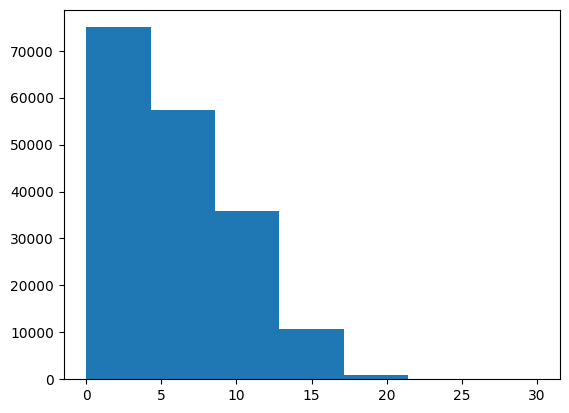

In [137]:
plt.hist(train_df["line_number"], bins=7)

In [139]:
train_line_num_one_hot= tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_num_one_hot= tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_num_one_hot= tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

train_line_num_one_hot[:5], train_line_num_one_hot.shape

(<tf.Tensor: shape=(5, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([180040, 15]))

(array([ 4746., 62788., 79629., 26743.,  5290.,   727.,   117.]),
 array([ 3.        ,  6.85714286, 10.71428571, 14.57142857, 18.42857143,
        22.28571429, 26.14285714, 30.        ]),
 <BarContainer object of 7 artists>)

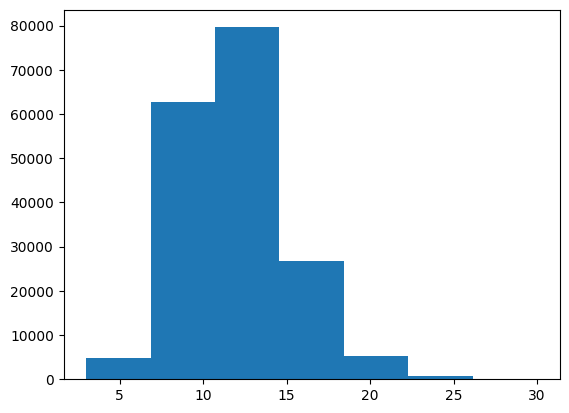

In [140]:
plt.hist(train_df["total_lines"], bins=7)

In [141]:
np.percentile(train_df["total_lines"], 95)

18.0

In [142]:
np.percentile(train_df["line_number"], 95)

13.0

In [144]:
train_total_lines_one_hot= tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot= tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot= tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

train_total_lines_one_hot[:15], train_total_lines_one_hot.shape

(<tf.Tensor: shape=(15, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0

### Model

In [145]:
token_inputs= layers.Input(shape=[], dtype=tf.string)
token_encoder= sentences_encoder_layer(token_inputs)
token_outputs= layers.Dense(128, activation="relu")(token_encoder)
token_model= tf.keras.Model(token_inputs, token_outputs)

char_inputs= layers.Input(shape=(1,), dtype=tf.string)
char_vect= char_vectorizer(char_inputs)
char_embeddings = char_embedding(char_vect)
char_outputs= layers.Bidirectional(layers.LSTM(64))(char_embeddings)
char_model= tf.keras.Model(char_inputs, char_outputs)

line_num_inputs= layers.Input(shape=(15,), dtype=tf.float32)
line_num_outputs= layers.Dense(32, activation="relu")(line_num_inputs)
line_num_model= tf.keras.Model(line_num_inputs, line_num_outputs)

total_line_inputs= layers.Input(shape=(20,), dtype=tf.float32)
total_line_outputs= layers.Dense(32, activation="relu")(total_line_inputs)
total_line_model= tf.keras.Model(total_line_inputs, total_line_outputs)

token_char_concat= layers.Concatenate(name="token_char")([token_model.output, char_model.output])

z= layers.Dense(256, activation="relu")(token_char_concat)
combined_dropouts= layers.Dropout(0.5)(z)

lines_token_char_concat= layers.Concatenate(name="lines_token_char")([line_num_model.output, total_line_model.output, combined_dropouts])


output_layer= layers.Dense(num_classes, activation="softmax")(lines_token_char_concat)

model5= tf.keras.Model(inputs=[line_num_model.input, total_line_model.input, token_model.input, char_model.input],
                       outputs= output_layer)

In [146]:
model5.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 text_vectorization_1 (Text  (None, 290)                  0         ['input_5[0][0]']             
 Vectorization)                                                                                   
                                                                                                  
 sentence_encoder (KerasLay  (None, 512)                  2567978   ['input_4[0][0]']       

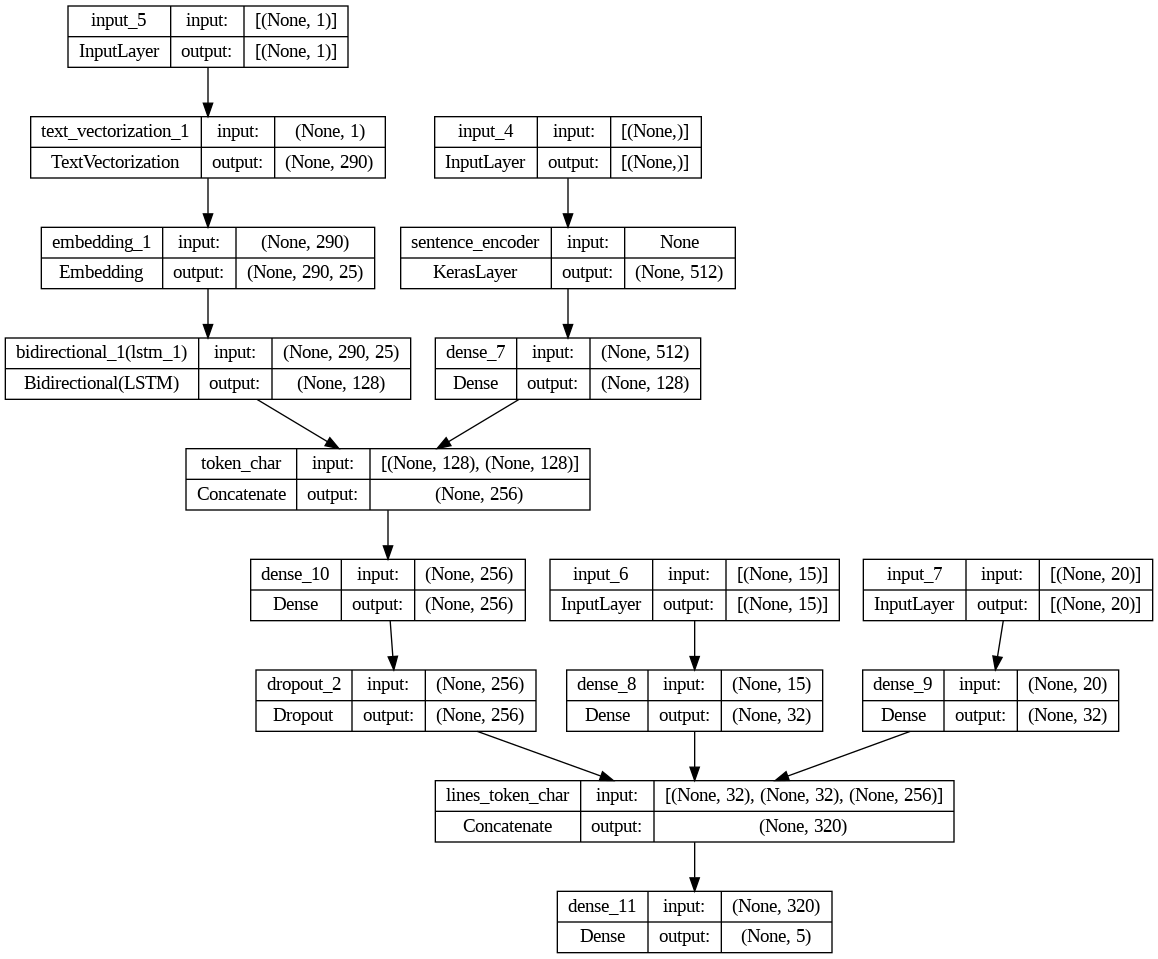

In [147]:
plot_model(model5, show_shapes=True)

In [148]:
model5.compile(loss= tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

### Dataset

In [171]:
train_num_lines_tokens_chars=tf.data.Dataset.from_tensor_slices((train_line_num_one_hot,
                                                                 train_total_lines_one_hot,
                                                                 train_sentences,
                                                                 train_chars))
train_labels_lines_tokens_chars= tf.data.Dataset.from_tensor_slices((train_labels_one_hot))
train_char_token_pos_dataset= tf.data.Dataset.zip((train_num_lines_tokens_chars, train_labels_lines_tokens_chars))
train_char_token_pos_dataset= train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_num_lines_tokens_chars=tf.data.Dataset.from_tensor_slices((val_line_num_one_hot,
                                                                 val_total_lines_one_hot,
                                                                 val_sentences,
                                                                 val_chars))
val_labels_lines_tokens_chars= tf.data.Dataset.from_tensor_slices((val_labels_one_hot))
val_char_token_pos_dataset= tf.data.Dataset.zip((val_num_lines_tokens_chars, val_labels_lines_tokens_chars))
val_char_token_pos_dataset= val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



test_num_lines_tokens_chars=tf.data.Dataset.from_tensor_slices((test_line_num_one_hot,
                                                                 test_total_lines_one_hot,
                                                                 test_sentences,
                                                                 test_chars))
test_labels_lines_tokens_chars= tf.data.Dataset.from_tensor_slices((test_labels_one_hot))
test_char_token_pos_dataset= tf.data.Dataset.zip((test_num_lines_tokens_chars, test_labels_lines_tokens_chars))
test_char_token_pos_dataset= test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



In [173]:
train_char_token_pos_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [175]:
val_char_token_pos_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [176]:
history5= model5.fit(train_char_token_pos_dataset,
                     steps_per_epoch= int(0.1*len(train_char_token_pos_dataset)),
                     epochs=3,
                     validation_data= val_char_token_pos_dataset,
                     validation_steps=int(0.1*len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 178s 301ms/step - loss: 1.0927 - accuracy: 0.7267 - val_loss: 0.9801 - val_accuracy: 0.8029
Epoch 2/3
562/562 [==============================] - 135s 239ms/step - loss: 0.9650 - accuracy: 0.8170 - val_loss: 0.9502 - val_accuracy: 0.8281
Epoch 3/3
562/562 [==============================] - 135s 240ms/step - loss: 0.9492 - accuracy: 0.8222 - val_loss: 0.9358 - val_accuracy: 0.8321


In [177]:
model5_pred_probs= model5.predict(val_char_token_pos_dataset)

945/945 [==============================] - 58s 59ms/step


In [178]:
model5_preds= tf.argmax(model5_pred_probs, axis=1)
model5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [179]:
model5_results= calculate_results(val_labels_encoded,
                                  model5_preds)
model5_results

{'accuracy': 83.4866940288627,
 'precision': 0.8338416419269481,
 'recall': 0.8348669402886271,
 'f1': 0.8338580882083092}

In [180]:
model1_results

{'accuracy': 81.98400355476561,
 'precision': 0.8189099549738115,
 'recall': 0.819840035547656,
 'f1': 0.8183858511034201}

## Making example predictions

In [181]:
import json
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

--2023-12-28 13:32:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘skimlit_example_abstracts.json’

skimlit_example_abs 100%[===================>]   6.58K  --.-KB/s    in 0s      

2023-12-28 13:32:05 (36.9 MB/s) - ‘skimlit_example_abstracts.json’ saved [6737/6737]



[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [182]:
abstracts = pd.DataFrame(example_abstracts)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [195]:
# def paragraph_to_sentences(paragraph):
#     sentences = paragraph.split('. ')
#     if not sentences[-1].endswith('.'):
#         sentences[-2] += sentences[-1]
#         sentences.pop()
#     return sentences

# abstracts["sentences"] = abstracts["abstract"].apply(paragraph_to_sentences)


# abstract_lines = abstracts["sentences"].explode().tolist()

# abstract_lines



In [196]:
from spacy.lang.en import English
nlp = English()

sentencizer = nlp.add_pipe("sentencizer")

doc = nlp(example_abstracts[0]["abstract"])
abstract_lines = [str(sent) for sent in list(doc.sents)]
abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [197]:
total_lines_in_sample = len(abstract_lines)

sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines


[{'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'line_number': 0,
  'total_lines': 7},
 {'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'line_number': 1,
  'total_lines': 7},
 {'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'line_number': 2,
  'total_lines': 7},
 {'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'line_number': 3,
  'total_lines': 7},
 {'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'line_number': 4,
  'total_lines': 7},
 {'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'line_number': 5,
  'total_lines': 7},
 {'text'

In [198]:
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [199]:
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [200]:
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [201]:
%%time
test_abstract_pred_probs = model5.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

1/1 [==============================] - 3s 3s/step
CPU times: user 2.88 s, sys: 67.7 ms, total: 2.95 s
Wall time: 3.18 s


array([[0.28964233, 0.11763461, 0.01794562, 0.5431632 , 0.03161418],
       [0.06076803, 0.02651663, 0.73003507, 0.08679821, 0.09588212],
       [0.11934248, 0.05258111, 0.57392454, 0.15441015, 0.0997418 ],
       [0.10175565, 0.15372682, 0.5055622 , 0.08146987, 0.15748541],
       [0.05467854, 0.09913734, 0.343019  , 0.04942291, 0.45374212],
       [0.03656347, 0.11036134, 0.5550545 , 0.03892604, 0.25909474],
       [0.02401899, 0.14650746, 0.0699404 , 0.02202179, 0.7375114 ],
       [0.01594145, 0.10627899, 0.15727754, 0.02844437, 0.69205767]],
      dtype=float32)

In [203]:
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 4, 2, 4, 4])>

In [204]:
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS']

## Visualizing the prediction:

In [205]:
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.


## Results

In [206]:
all_model_results = pd.DataFrame({"model0": model0_results,
                                  "model1": model1_results,
                                  "model2": model2_results,
                                  "model3": model3_results,
                                  "model4": model4_results,
                                  "model5": model5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model0,75.168296,0.755612,0.751683,0.734085
model1,81.984004,0.818910,0.819840,0.818386
model2,71.135303,0.713819,0.711353,0.708663
model3,65.211620,0.646136,0.652116,0.639507
model4,73.220951,0.735999,0.732210,0.730106
model5,83.486694,0.833842,0.834867,0.833858


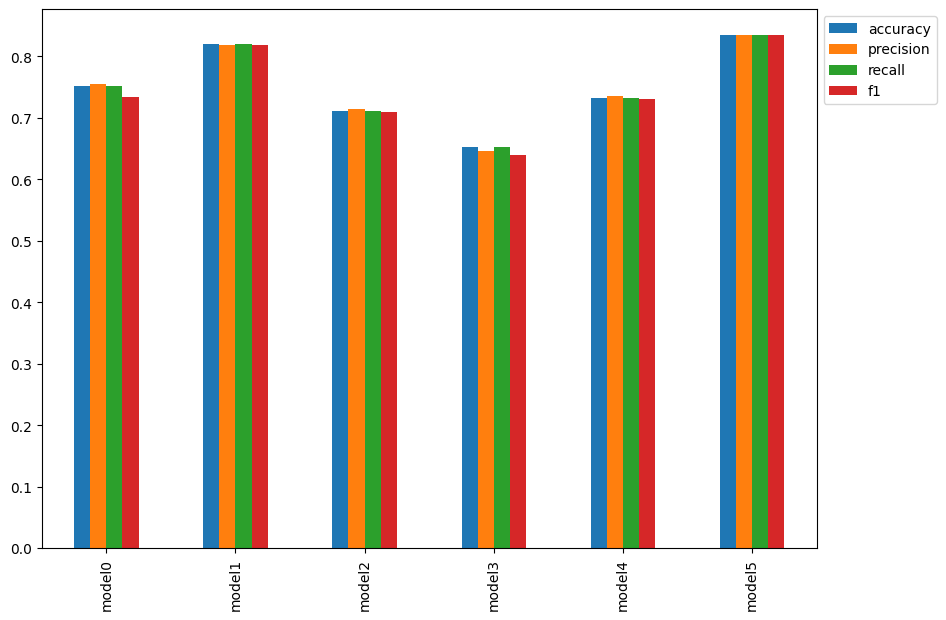

In [207]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));